In [2]:
%pylab inline
import numpy as np

import seaborn as sns
sns.set_style('ticks')
sns.set_context('paper')

from design import Design
from conformation import Conformation
from plot import *

Populating the interactive namespace from numpy and matplotlib


## demo Conformation class

Scoring includes GNM elastic energy


/Users/hwayment/das/github/pyFold/utils/energy_utils.py:100: RuntimeWarning: invalid value encountered in log
  return_vec.append(-1.5*np.nansum(np.log(nonzero_eigenvals)))


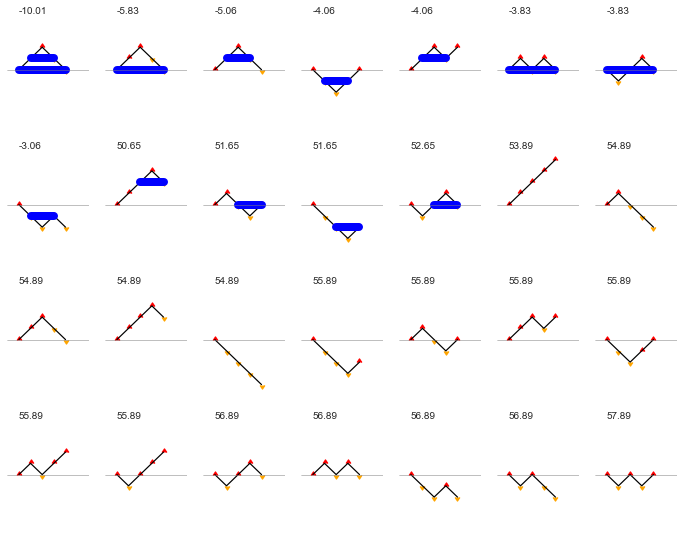

In [3]:
# this sequence checks out with the matlab unit test
# energies aren't the same here because using stacking and gaussian network fluctuation energy model

conf = Conformation(sequence='UAUUA')
conf.run()

figure(figsize=(12,12))

# explicitly view all conformations, useful for troubleshooting
draw_conformations(conf,structs_per_row=7)

((..[)).] , .(..[)..] , (...[.).] , .(..[)..] , ..(.[.).] , (...[.).] , .(..[)..] , ..(.[.).] , .(..[)..] , (...[.).] , ..(.[.).] , (...[.).] , .(..[)..] , ..(.[.).] , .(..[)..] , .(..[)..] , ..(.[.).] , .(..[)..] , (...[.).] , ..(.[.).] , (...[.).] , ..(.[.).] , (...[.).] , ..(.[.).]


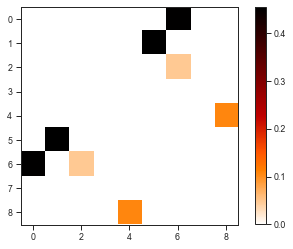

In [6]:
# Input custom energy parameter model

from utils.energy_utils import Parameters

energy_mdl = Parameters(epsilon=-2, delta=4, sigma=0, gnm=False)
conf = Conformation(sequence='AGAAGCUAC', params=energy_mdl)
conf.run()

# See all conformations that contain a pseudoknot
# NB: Util to write dbn strings from p arrays can handle arbitrarily many layers of pks 8)

print(' , '.join([x for x in conf.dbn_strings if '[' in x]))

#how to get bp matrix
imshow(conf.bpps, cmap='gist_heat_r')
colorbar()

Scoring includes GNM elastic energy


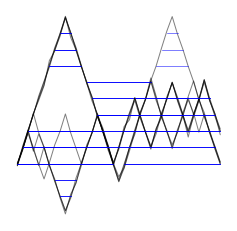

In [75]:
#playing with overlaying traces

conf = Conformation(secstruct = '(((...(((.)))[[[))).(((]]](((.)))...)))')
conf.run()
figure(figsize=(4,4))
draw_traces(conf)

## [for kicks] draw a connectivity matrix with force-directed graph in networkx

In [36]:
conf = Conformation(secstruct = '..((.((..((...)))..)..(((...)))....))')
conf.run()

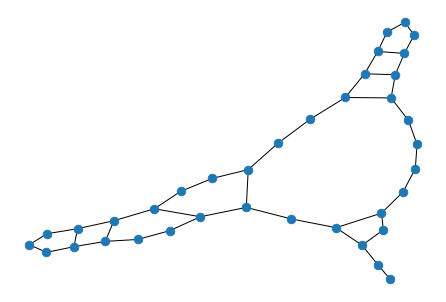

In [37]:
import networkx as nx

adj_matrix = copy(conf.connectivity_matrices[0])

# boost spring constant on backbone
for m in range(conf.N-1):
    if conf.is_chainbreak[m] != 1:
        adj_matrix[m,m+1] += 1
        adj_matrix[m+1,m] += 1

g = nx.Graph(adj_matrix)
pos = nx.drawing.layout.spring_layout(g, k=0.1, iterations=1000)

nx.draw(g, pos=pos, edge_color='k', node_shape='.')

## Demonstrate Design class

Found 16 sequences to test


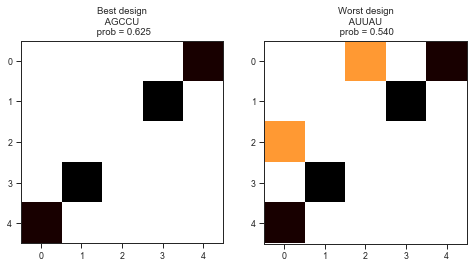

In [76]:
# following matlab unit test

# sequence ordering isn't the same as in matlab, 
# maybe a weird difference in sorting? since there's
# only two energies found in this simple energetic model. but otherwise checks out

design_mdl = Design(secstruct='((.))', params=Parameters(epsilon=-2, delta=1, sigma=0, gnm=False))
figure(figsize=(8,4))
design_mdl.run()

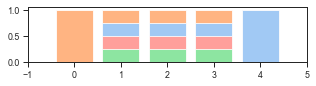

In [39]:
plot_seqlogo(design_mdl.sequences)

#todo: make legend. orange=A, blue=U, red=G, green=C

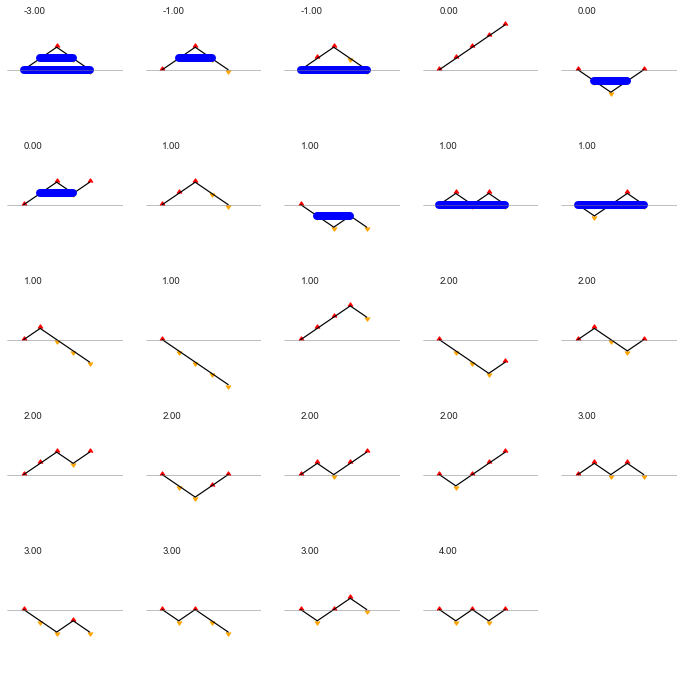

In [77]:
# design_mdl attribute conformations is list of Conformation classes

figure(figsize=(12,12))
draw_conformations(design_mdl.conformations[0])

Found 4 sequences to test


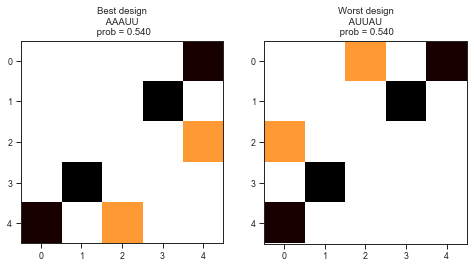

In [79]:
design_mdl = Design(secstruct='((.))', pattern='AWWWW', params=Parameters(epsilon=-2, delta=1, sigma=0, gnm=False))
figure(figsize=(8,4))
design_mdl.run()

Found 64 sequences to test


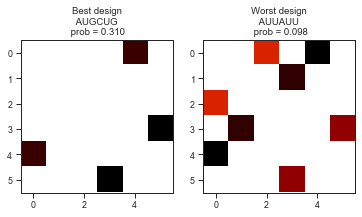

In [80]:
design_mdl = Design(secstruct='(..[)]', params=Parameters(epsilon=-2, delta=1, sigma=0, gnm=False))
design_mdl.run()